# Automação de Indicadores

### Objetivo: Treinar e criar um Projeto Completo que envolva a automatização de um processo feito no computador

### Descrição:

Imagine que você trabalha em uma grande rede de lojas de roupa com 25 lojas espalhadas por todo o Brasil.

Todo dia, pela manhã, a equipe de análise de dados calcula os chamados One Pages e envia para o gerente de cada loja o OnePage da sua loja, bem como todas as informações usadas no cálculo dos indicadores.

Um One Page é um resumo muito simples e direto ao ponto, usado pela equipe de gerência de loja para saber os principais indicadores de cada loja e permitir em 1 página (daí o nome OnePage) tanto a comparação entre diferentes lojas, quanto quais indicadores aquela loja conseguiu cumprir naquele dia ou não.


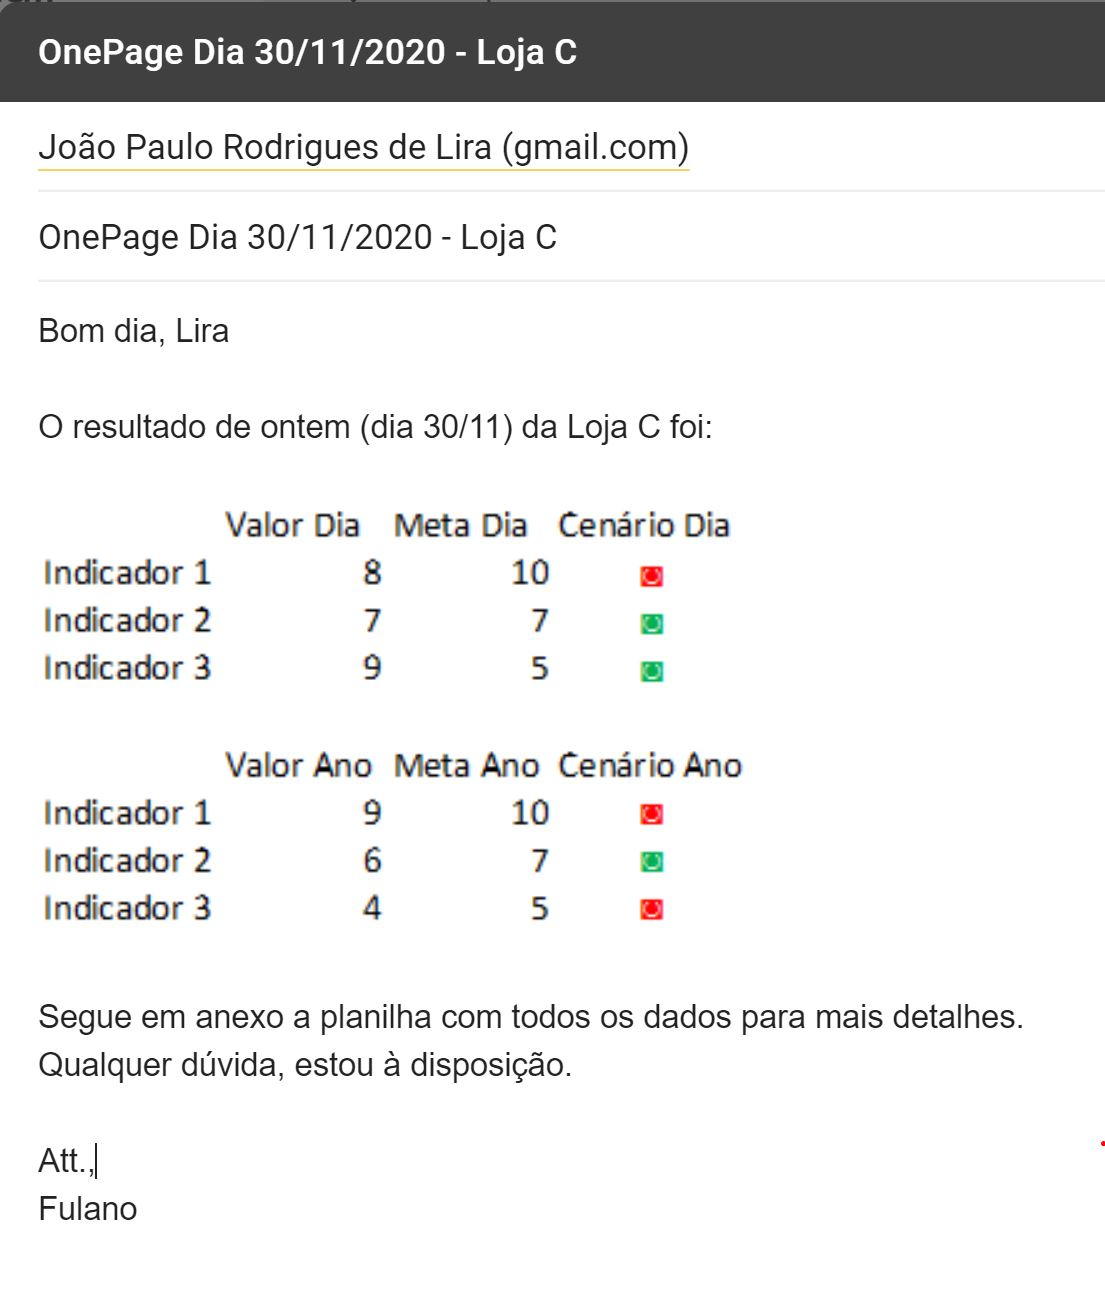

In [ ]:
# importar bibliotecas
import pandas as pd
import pathlib

    
# importar bases de dados
emails = pd.read_excel(r'Bases de dados\Emails.xlsx')
lojas = pd.read_csv(r'Bases de dados\Lojas.csv',sep=';', encoding='latin1')
vendas = pd.read_excel(r'Bases de dados\Vendas.xlsx')             

#incluir nome da loja em vendas
vendas = vendas.merge(lojas, on = 'ID Loja')
display(vendas)

# Criar uma dataframe para cada loja

dict_lojas = {}
for loja in lojas['Loja']:
    dict_lojas[loja] = vendas.loc[vendas['Loja'] ==loja, :]

# Cada indicador deve ser calculado no dia e no ano. O indicador do dia deve ser o do último dia disponível na planilha de Vendas (a data mais recente)
dia_indicador = vendas['Data'].max()

# Identificar se a pasta já existe
# import os
import pathlib

caminho_backup = pathlib.Path(r'Backup Arquivos Lojas')
arquivos_pasta_backup = caminho_backup.iterdir()

lista_nomes_backup = [arquivo.name for arquivo in arquivos_pasta_backup]

for loja in dict_lojas:
    if loja not in lista_nomes_backup:
        nova_pasta = caminho_backup / loja # Recurso do pathlib 
        nova_pasta.mkdir()
# Salvar o arquivo dentro da pasta

    nome_arquivo = '{}_{}_{}.xlsx'.format(dia_indicador.month, dia_indicador.day, loja)
    local_arquivo = caminho_backup / loja / nome_arquivo
    dict_lojas[loja].to_excel(local_arquivo)

# Calcular os indicadores e enviar o email para os gerentes

meta_faturamento_dia = 1000
meta_faturamento_ano = 1650000
meta_quantidade_produtosDia = 4
meta_quantidade_produtosAno = 120
meta_ticketmedio_dia = 500
meta_ticketmedio_ano = 500

for loja in dict_lojas:

    vendas_loja = dict_lojas[loja]
    vendas_loja_dia = vendas_loja.loc[vendas_loja['Data'] == dia_indicador, :]

    # Faturamento
    faturamento_ano = vendas_loja['Valor Final'].sum() 
    faturamento_dia = vendas_loja_dia['Valor Final'].sum()


# Diversidade de produtos

    produtos_ano = len(vendas_loja['Produto'].unique())
    produtos_dia = len(vendas_loja_dia['Produto'].unique())

# Ticket Médio
    valor_venda = vendas.groupby('Código Venda').sum()
    ticket_medio_ano = valor_venda['Valor Final'].mean()


# Ticket Médio Dia

    valor_venda_dia = vendas_loja_dia.groupby('Código Venda').sum()
    ticket_medio_dia = valor_venda_dia['Valor Final'].mean()


    if faturamento_dia >=meta_faturamento_dia:
        cor_faturamentoDia = 'green'
    else:
        cor_faturamentoDia = 'red'

    if faturamento_ano >= meta_faturamento_ano:
        cor_faturamentoAno= 'green'
    else:
        cor_faturamentoAno = 'red'

    if produtos_dia >= meta_quantidade_produtosDia:
        cor_qtdeDia = 'green'
    else:
        cor_qtdeDia = 'red'

    if ticket_medio_dia >= meta_ticketmedio_dia:
        cor_ticketDia = 'green'
    else:
        cor_ticketDia = 'red'

    if ticket_medio_ano >= meta_ticketmedio_ano:
        cor_ticketAno = 'green'
    else:
        cor_ticketAno = 'red'

    if produtos_ano >= meta_quantidade_produtosAno:
        cor_qtdeAno = 'green'
    else:
        cor_qtdeAno = 'red'

# Algumas variáveis
    nome = emails.loc[emails['Loja'] == loja, 'Gerente'].values[0]
    assunto = ('One page dia {}/{} - Loja {}'.format(dia_indicador.day, dia_indicador.month, loja))
    destinatario = emails.loc[emails['Loja'] == loja, 'E-mail'].values[0]
    anexo = pathlib.Path.cwd() / caminho_backup/ loja / f'{dia_indicador.month}_{dia_indicador.day}_{loja}.xlsx'

# Escrevendo o E-mail

    mensagem = f''' <p> Bom dia, {nome} </p>
    <p> O resultado de ontem  <strong> ({dia_indicador.day}/{dia_indicador.month}) </strong> da <strong> loja {loja}</strong>  foi: </p>

    <table>
      <tr>
        <th>Indicador</th>
        <th>Valor dia</th>
        <th>Meta dia</th>
        <th>Cenário dia</th>
      </tr>
      <tr>
        <td>Faturamento</td>
        <td style = "text-align : center">R${faturamento_dia:.2f}</td>
        <td style = "text-align : center">R${meta_faturamento_dia:.2f}</td>
        <td style = "text-align : center"><font color="{cor_faturamentoDia}">◙</td>
      </tr>
      <tr>
        <td>Diversidade de produtos</td>
        <td style = "text-align : center">{produtos_dia}</td>
        <td style = "text-align : center">{meta_quantidade_produtosDia}</td>
        <td style = "text-align : center"><font color="{cor_qtdeDia}">◙</td>
      </tr>
      <tr>
       <td>Ticket Médio</td>
        <td style = "text-align : center">R${ticket_medio_dia:.2f}</td>
        <td style = "text-align : center">R${meta_ticketmedio_dia:.2f}</td>
        <td style = "text-align : center"><font color="{cor_ticketDia}">◙</td>
      </tr>
    </table>
    <br>
    <table>
      <tr>
        <th>Indicador</th>
        <th>Valor Ano</th>
        <th>Meta Ano</th>
        <th>Cenário Ano</th>
      </tr>
      <tr>
        <td>Faturamento</td>
        <td style = "text-align : center">R${faturamento_ano:.2f}</td>
        <td style = "text-align : center">R${meta_faturamento_ano:.2f}</td>
        <td style = "text-align : center"><font color="{cor_faturamentoAno}">◙</td>
      </tr>
      <tr>
        <td>Diversidade de produtos</td>
        <td style = "text-align : center">{produtos_ano}</td>
        <td style = "text-align : center">{meta_quantidade_produtosAno}</td>
        <td style = "text-align : center"><font color="{cor_qtdeAno}">◙</td>
      </tr>
      <tr>
       <td>Ticket Médio</td>
        <td style = "text-align : center">R${ticket_medio_ano:.2f}</td>
        <td style = "text-align : center">R${meta_ticketmedio_ano:.2f}</td>
        <td style = "text-align : center"><font color="{cor_ticketAno}">◙</td>
      </tr>
    </table>



    <p> Segue em anexo a planilha com todos os dados para mais detalhes. </p>

    <p> Qualquer dúvida, estou a a disposição </p>

    <p> Att. Otávio </p>

    '''

# Configuração G-mail
    import yagmail
    user = yagmail.SMTP(user ='seuemail@gmail.com', password = 'seupassword')

# Enviar e-mail
    user.send(to= destinatario, subject = assunto, contents = mensagem, attachments = anexo )
    print('E-mail da loja {} enviado.'.format(loja))

# Criar ranking para a diretoria

# Ranking de acordo com o faturamento da Loja

# Faturamento no Ano
faturamento_porLojaAno = vendas.groupby('Loja')[['Loja', 'Valor Final']].sum()
faturamento_porLojaAno = faturamento_porLojaAno.sort_values(by= 'Valor Final', ascending=False)
# display(faturamento_porLojaAno)

# Ranking Anual em Excel
nome_arquivo = '{}_{}_Ranking Anual.xlsx'.format(dia_indicador.month, dia_indicador.day)
faturamento_porLojaAno.to_excel(r'Backup Arquivos Lojas\{}'.format(nome_arquivo))

# Faturamento por dia
vendas_dia = vendas.loc[vendas['Data'] == dia_indicador, :]
faturamento_porLojaDia = vendas_dia.groupby('Loja')[['Loja', 'Valor Final']].sum()
faturamento_porLojaDia = faturamento_porLojaDia.sort_values(by= 'Valor Final', ascending=False)
# display(faturamento_porLojaDia)

nome_arquivo = '{}_{}_Ranking Diário.xlsx'.format(dia_indicador.month, dia_indicador.day)
faturamento_porLojaDia.to_excel(r'Backup Arquivos Lojas\{}'.format(nome_arquivo))

# Enviar e-mail para a diretoria

# Algumas variáveis

nome = emails.loc[emails['Loja'] == "Diretoria", 'E-mail'].values[0]
assunto = ('Ranking dia {}/{}'.format(dia_indicador.day, dia_indicador.month))
destinatario = emails.loc[emails['Loja'] == loja, 'E-mail'].values[0]
anexo = pathlib.Path.cwd() / caminho_backup/f'{dia_indicador.month}_{dia_indicador.day}_Ranking anual.xlsx'
anexo2 = pathlib.Path.cwd() / caminho_backup/f'{dia_indicador.month}_{dia_indicador.day}_Ranking Diário.xlsx'


# Escrevendo o E-mail

mensagem = f'''
Prezados, bom dia

Melhor loja do Dia em Faturamento: Loja {faturamento_porLojaDia.index[0]} com Faturamento R${faturamento_porLojaDia.iloc[0, 0]:.2f}
Pior loja do Dia em Faturamento: Loja {faturamento_porLojaDia.index[-1]} com Faturamento R${faturamento_porLojaDia.iloc[-1, 0]:.2f}

Melhor loja do Ano em Faturamento: Loja {faturamento_porLojaAno.index[0]} com Faturamento R${faturamento_porLojaAno.iloc[0, 0]:.2f}
Pior loja do Ano em Faturamento: Loja {faturamento_porLojaAno.index[-1]} com Faturamento R${faturamento_porLojaAno.iloc[-1, 0]:.2f}

Segue em anexo os rankings do ano e do dia de todas as lojas.

Qualquer dúvida estou à disposição.

Att.,
Otávio
'''

# Enviar e-mail
user.send(to= destinatario, subject = assunto, contents = mensagem, attachments = [anexo, anexo2] )

# Fim da automação
print('Código finalizado')

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Loja
0,1,2019-01-01,1,Sapato Estampa,1,358,358,Iguatemi Esplanada
1,1,2019-01-01,1,Camiseta,2,180,360,Iguatemi Esplanada
2,1,2019-01-01,1,Sapato Xadrez,1,368,368,Iguatemi Esplanada
3,21,2019-01-02,1,Camisa Gola V Listrado,2,116,232,Iguatemi Esplanada
4,34,2019-01-02,1,Sapato Listrado,1,363,363,Iguatemi Esplanada
...,...,...,...,...,...,...,...,...
100994,69846,2019-12-25,8,Short Estampa,2,96,192,Salvador Shopping
100995,69846,2019-12-25,8,Tênis Estampa,5,256,1280,Salvador Shopping
100996,69850,2019-12-25,8,Calça Estampa,4,177,708,Salvador Shopping
100997,69972,2019-12-26,8,Terno Liso,3,720,2160,Salvador Shopping
